## Dataset ===>> https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("./../data/raw/Heart Failure Dataset/heart.csv")

In [3]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [5]:
string_col = data.select_dtypes(include="object").columns
data[string_col] = data[string_col].astype("string")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


### Getting the categorical columns

In [7]:
string_col = data.select_dtypes("string").columns.to_list()

In [8]:
num_col = data.columns.to_list()

# print (num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [9]:
data.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

## Exploratory Data Analysis

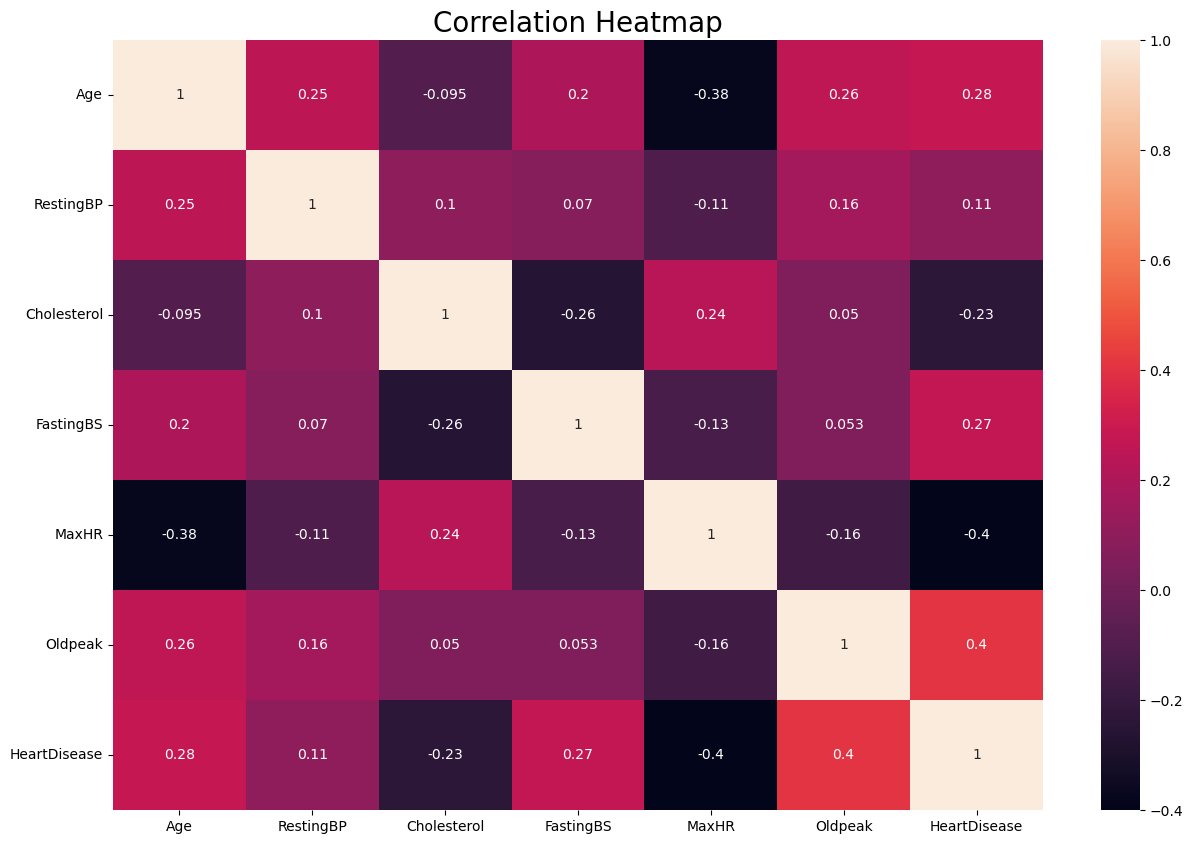

In [13]:
# Select only numerical columns for correlation
numerical_cols = data.select_dtypes(include=["number"])

# Draw heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_cols.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=20)
plt.yticks(rotation=0)
plt.show()

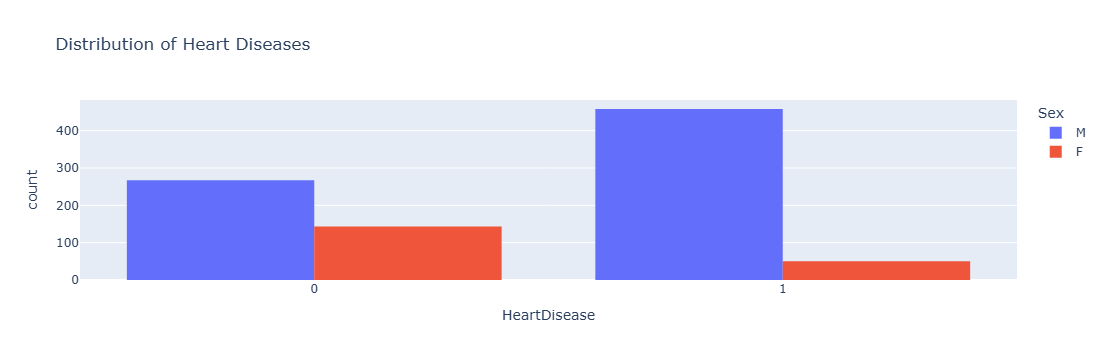

In [15]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(data, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=data.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

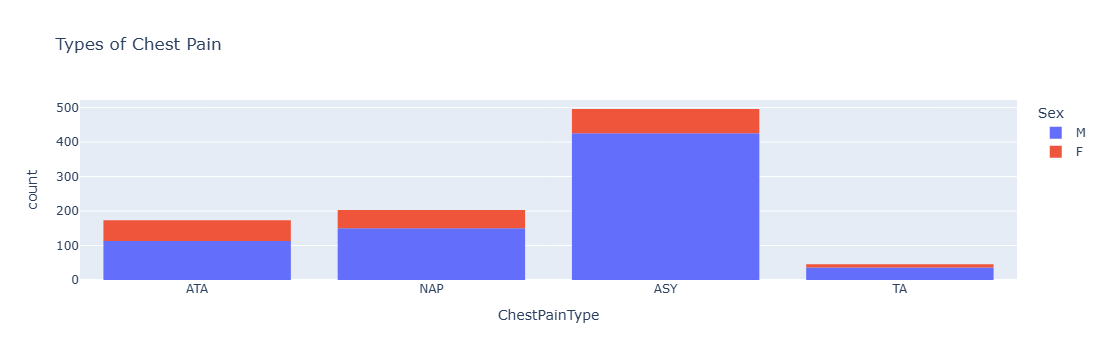

In [16]:
fig=px.histogram(data,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=data.columns,
                 title="Types of Chest Pain"
                )
fig.show()

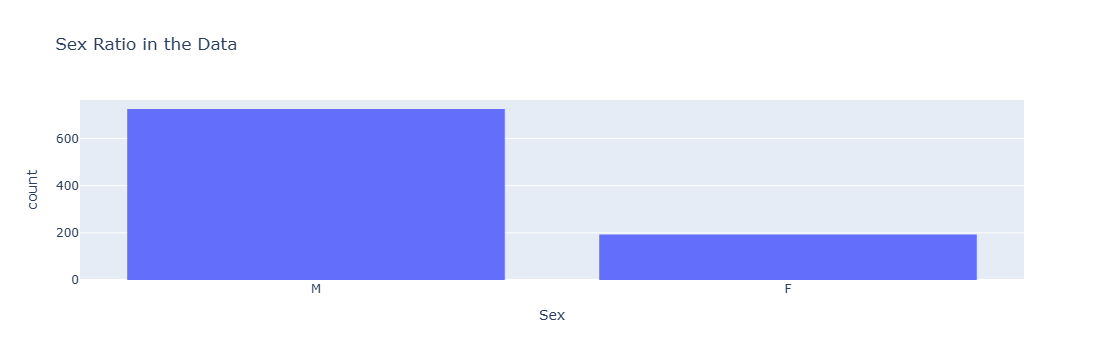

In [18]:
fig=px.histogram(data,
                 x="Sex",
                 hover_data=data.columns,
                 title="Sex Ratio in the Data")
fig.show()

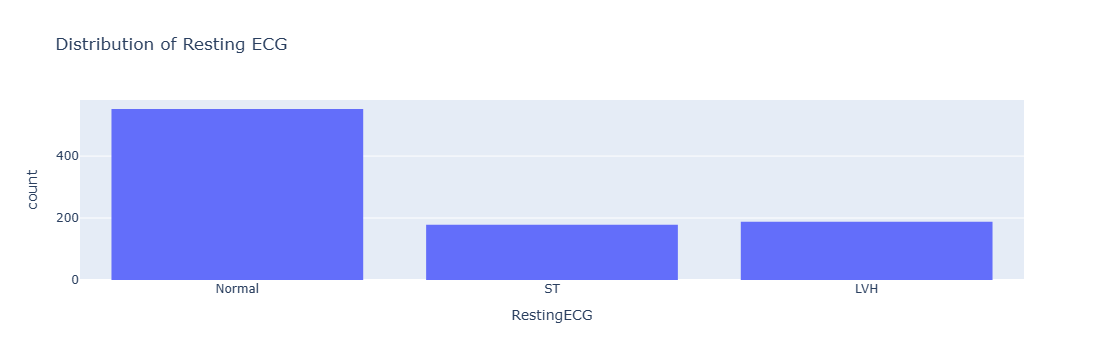

In [19]:
fig=px.histogram(data,
                 x="RestingECG",
                 hover_data=data.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

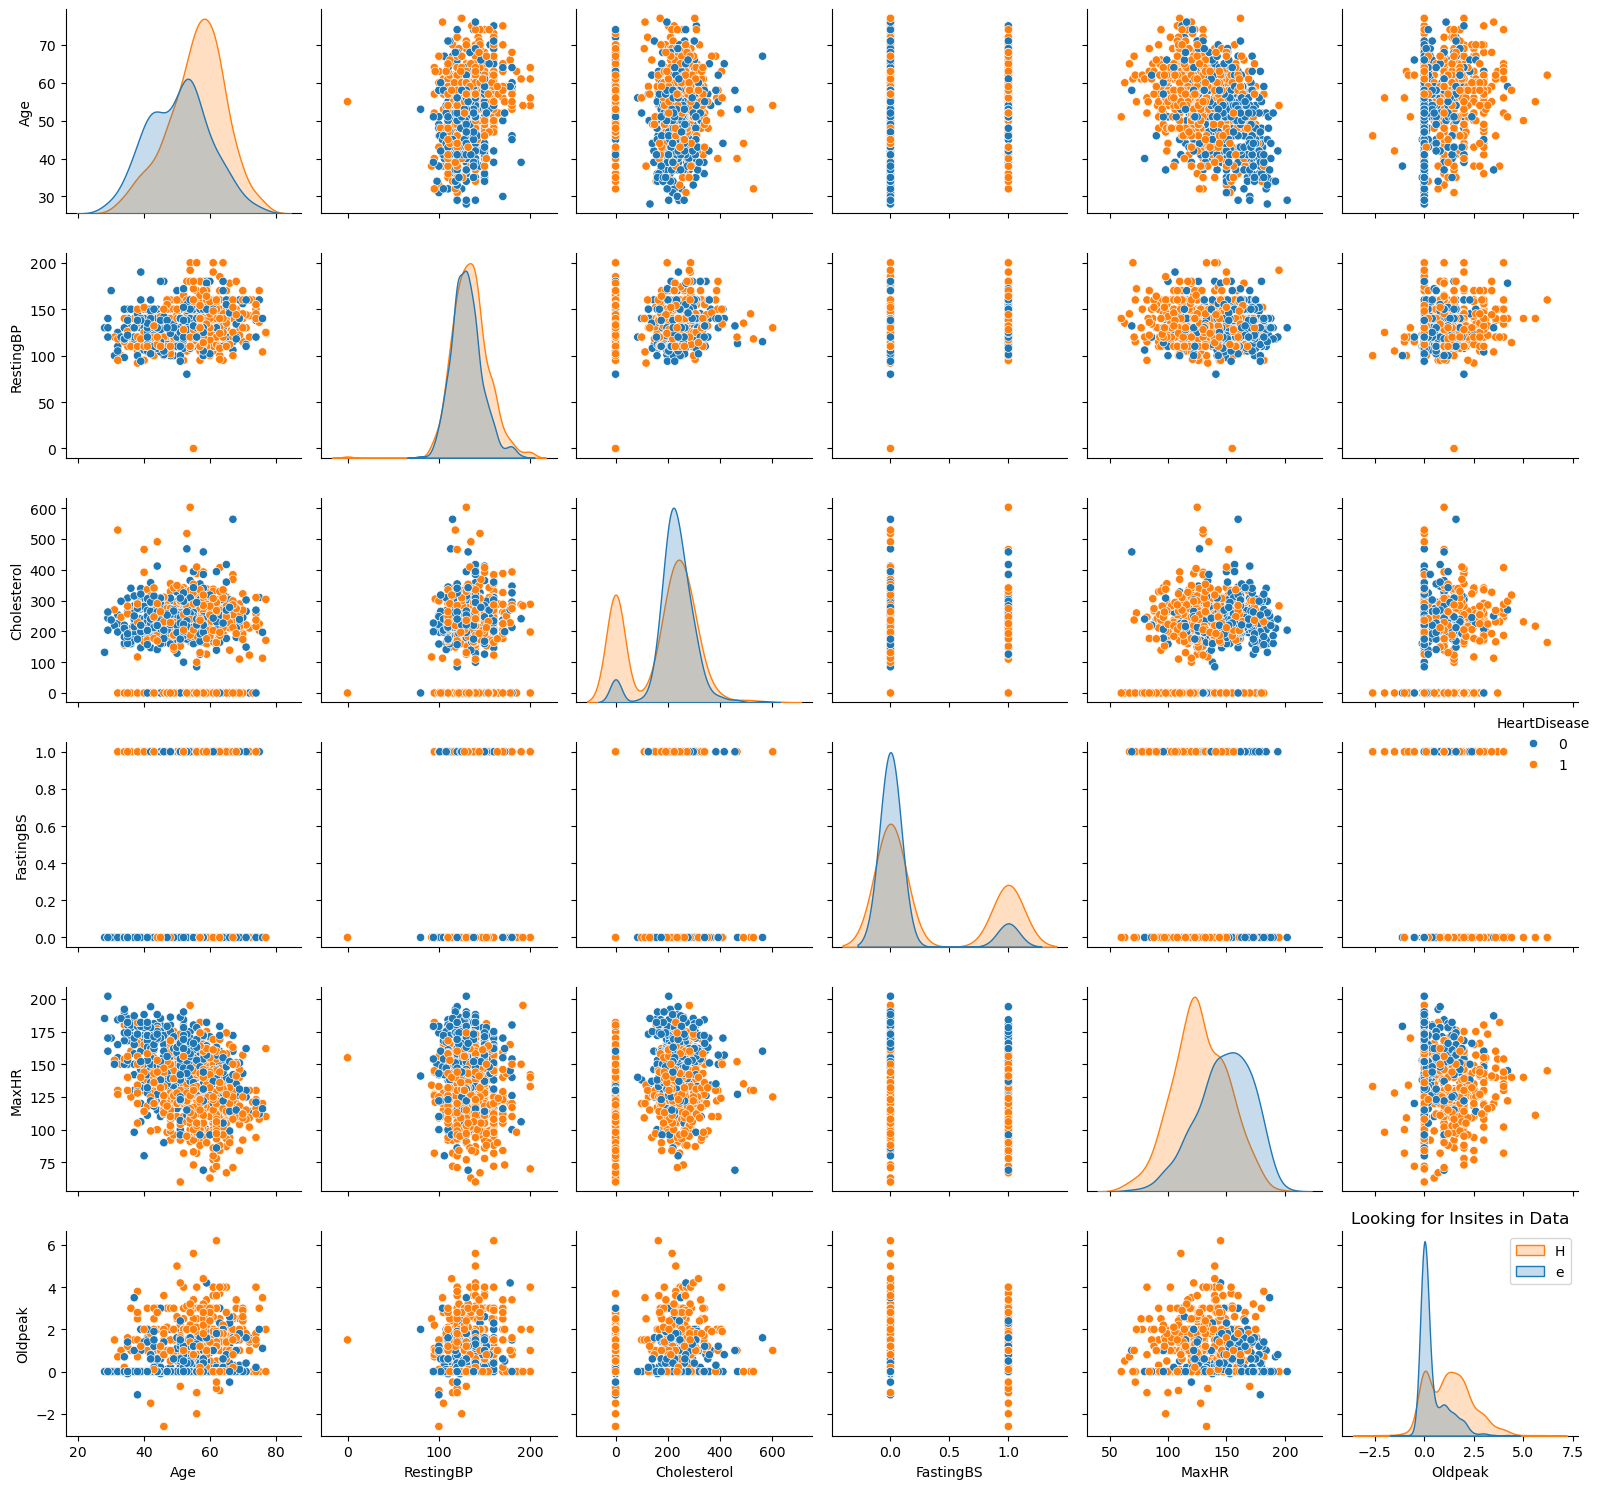

In [20]:
plt.figure(figsize=(15,10))
sns.pairplot(data,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

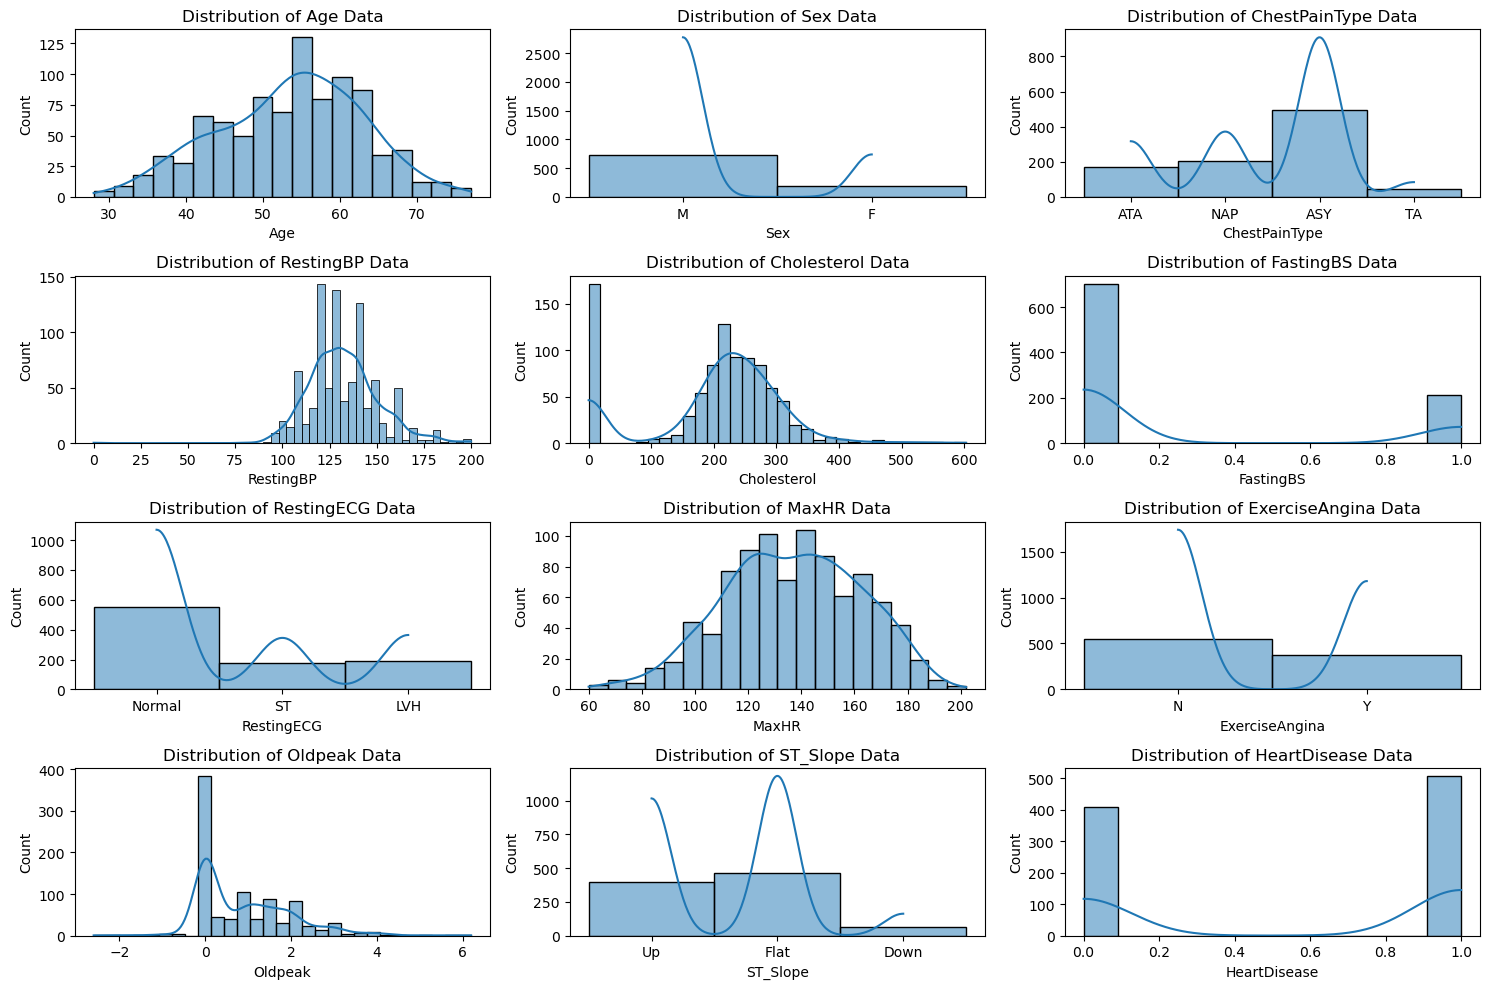

In [21]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Handling Outlirs

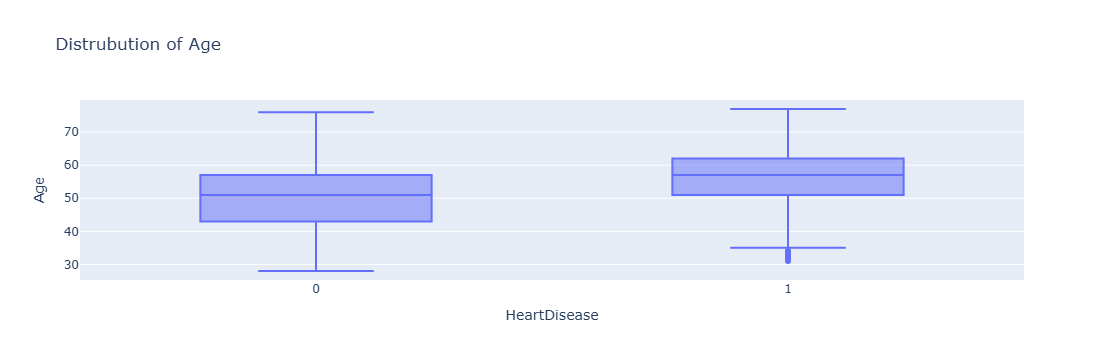

In [22]:
fig = px.box(data,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

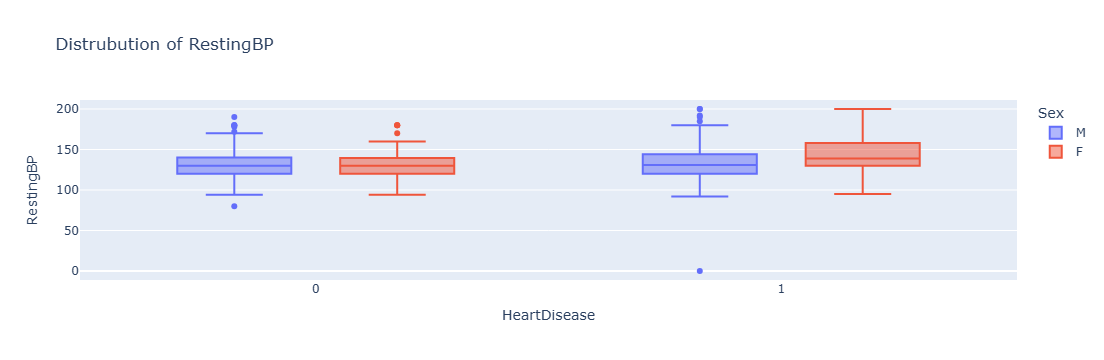

In [23]:
fig = px.box(data,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

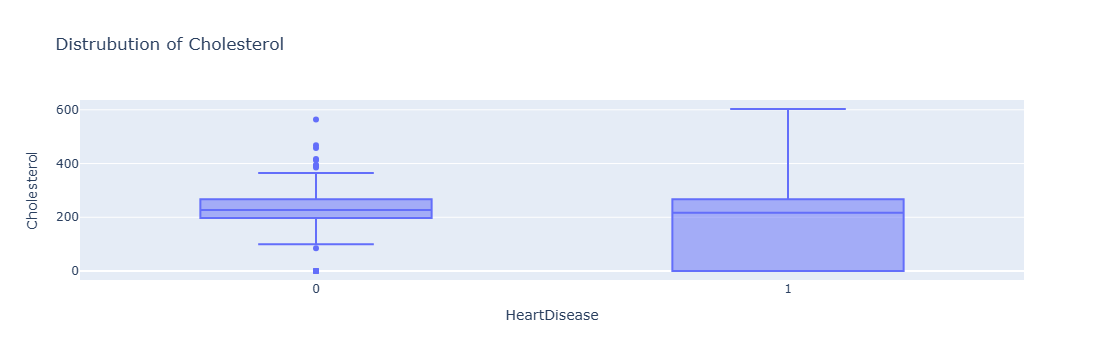

In [24]:
fig = px.box(data,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

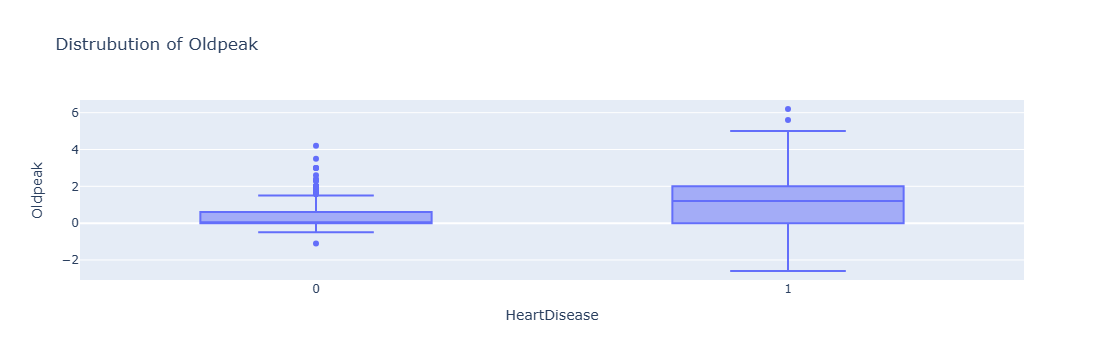

In [25]:
fig = px.box(data,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

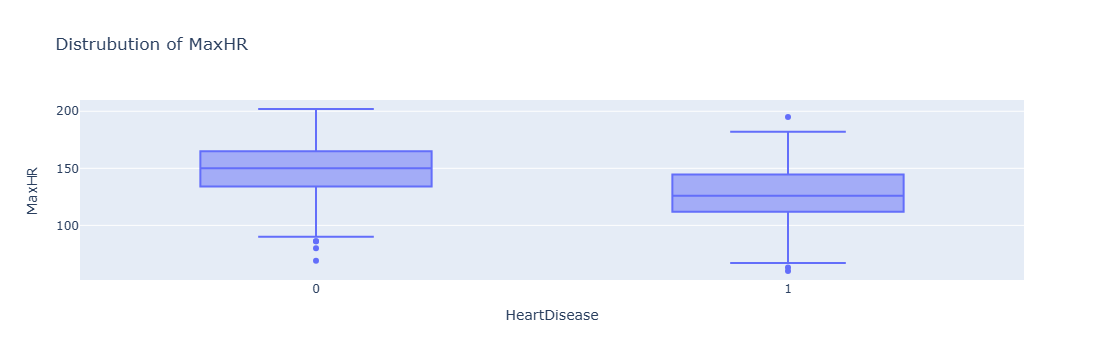

In [26]:
fig = px.box(data,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

## Data Preprocessing

### 1. Handling Null Values :

In [27]:
# Checking for Type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [28]:
# Checking for NULLs in the data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 2. Feature Scaling

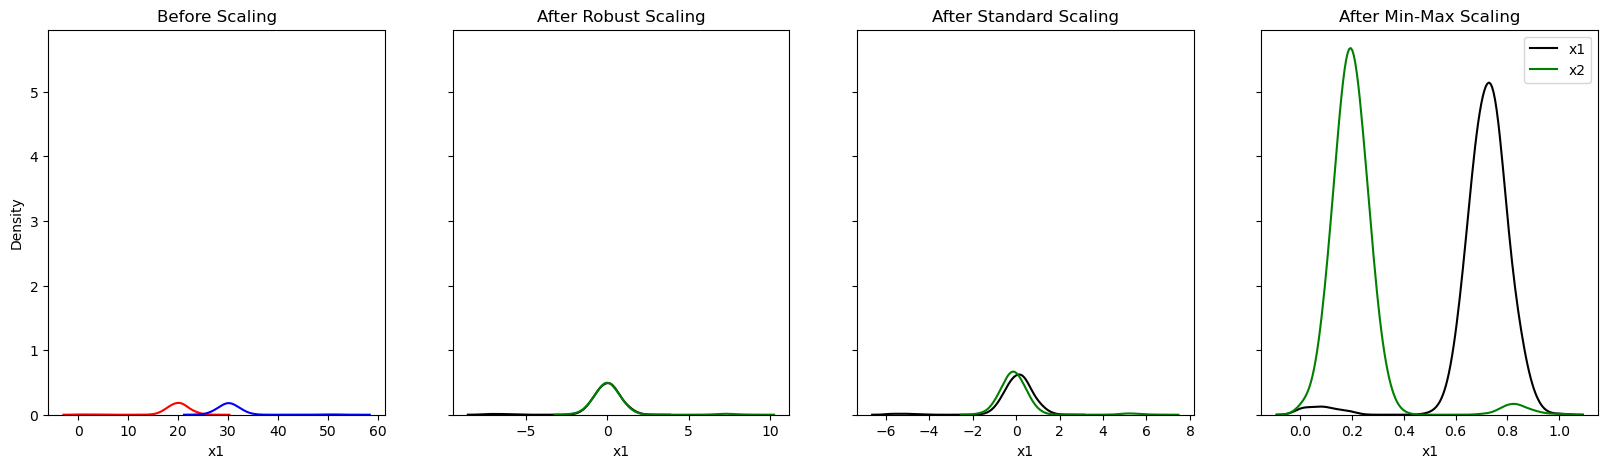

In [29]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Generate Data
np.random.seed(42)  # Ensure reproducibility
x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),  # Lower outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)])  # Higher outliers
})

# Scaling transformations
scalers = {
    "Robust Scaling": RobustScaler(),
    "Standard Scaling": StandardScaler(),
    "Min-Max Scaling": MinMaxScaler()
}

scaled_data = {name: pd.DataFrame(scaler.fit_transform(x), columns=x.columns) for name, scaler in scalers.items()}

# Plot Distributions
fig, axes = plt.subplots(ncols=4, figsize=(20, 5), sharey=True)

# Original data
axes[0].set_title("Before Scaling")
sns.kdeplot(x['x1'], ax=axes[0], color='r', label='x1')
sns.kdeplot(x['x2'], ax=axes[0], color='b', label='x2')

# Scaled data
colors = {'x1': 'r', 'x2': 'b', 'x1_scaled': 'black', 'x2_scaled': 'g'}
for ax, (name, df) in zip(axes[1:], scaled_data.items()):
    ax.set_title(f"After {name}")
    sns.kdeplot(df['x1'], ax=ax, color=colors['x1_scaled'], label='x1')
    sns.kdeplot(df['x2'], ax=ax, color=colors['x2_scaled'], label='x2')

plt.legend()
plt.show()


### 3. Handling Categorical Variables

In [30]:
data[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(data[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [31]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for tree-based models
data_tree = data.copy()
label_encoder = LabelEncoder()

# Encode only categorical columns
data_tree[data.select_dtypes(include="object").columns] = data_tree.select_dtypes(include="object").apply(label_encoder.fit_transform)

data_tree.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [32]:
# One-Hot Encoding for non-tree-based algorithms
data_nontree = pd.get_dummies(data, columns=data.select_dtypes(include="object").columns, drop_first=False)

data_nontree.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [33]:
# Move the target column to the end
target = "HeartDisease"

# Separate target variable
y = data_nontree.pop(target)

# Append target column at the end
data_nontree[target] = y

data_nontree.head()


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## Training our Machine Learning Model :

In [45]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np

# Identify the categorical columns in your dataset
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']  # Example

# Apply Label Encoding or One-Hot Encoding to the categorical columns
# For Label Encoding (for ordinal data)
le = LabelEncoder()
for col in categorical_columns:
    data_nontree[col] = le.fit_transform(data_nontree[col])

# OR you can use One-Hot Encoding for nominal data (where order doesn't matter)
# data_nontree = pd.get_dummies(data_nontree, columns=categorical_columns)

# Initialize the target and feature columns
feature_col_nontree = data_nontree.columns.to_list()
feature_col_nontree.remove(target)

# Encode the target column (y) if it contains categorical values
y = le.fit_transform(data_nontree[target])  # Encode target column if it's categorical

# Function to evaluate the model's performance
def evaluate_model(model, X_train, y_train, X_valid, y_valid, fold):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    print(f"The fold is : {fold}")
    print(classification_report(y_valid, y_pred))
    
    acc = roc_auc_score(y_valid, y_pred)
    print(f"The accuracy for Fold {fold+1}: {acc}")
    return acc

# Function for cross-validation
def cross_validate_model(model, X, y, feature_cols, target_col, n_splits=5):
    acc_list = []
    kf = model_selection.StratifiedKFold(n_splits=n_splits)
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        # Correctly use .iloc[] for row slicing and .loc[] for column slicing
        X_train = X.iloc[train_idx][feature_cols]
        y_train = y[train_idx]
        X_valid = X.iloc[val_idx][feature_cols]
        y_valid = y[val_idx]
        
        # Scale the features using MinMaxScaler
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)
        
        acc = evaluate_model(model, X_train, y_train, X_valid, y_valid, fold)
        acc_list.append(acc)
    
    return acc_list

# Logistic Regression Model
log_reg = LogisticRegression()
acc_log = cross_validate_model(log_reg, data_nontree, y, feature_col_nontree, target)

# Gaussian Naive Bayes Model
gauss_nb = GaussianNB()
acc_Gauss = cross_validate_model(gauss_nb, data_nontree, y, feature_col_nontree, target)

# Support Vector Machine (Linear Kernel)
svm_linear = SVC(kernel="linear")
acc_svm_linear = cross_validate_model(svm_linear, data_nontree, y, feature_col_nontree, target)

# Support Vector Machine (Sigmoid Kernel)
svm_sigmoid = SVC(kernel="sigmoid")
acc_svm_sig = cross_validate_model(svm_sigmoid, data_nontree, y, feature_col_nontree, target)

# Support Vector Machine (RBF Kernel)
svm_rbf = SVC(kernel="rbf")
acc_svm_rbf = cross_validate_model(svm_rbf, data_nontree, y, feature_col_nontree, target)

# Support Vector Machine (Polynomial Kernel)
svm_poly = SVC(kernel="poly")
acc_svm_poly = cross_validate_model(svm_poly, data_nontree, y, feature_col_nontree, target)

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=32)
acc_KNN = cross_validate_model(knn, data_nontree, y, feature_col_nontree, target)

# Optionally: you can store or return the accuracies from each model to compare them
models_accuracy = {
    "Logistic Regression": acc_log,
    "Gaussian Naive Bayes": acc_Gauss,
    "SVM Linear": acc_svm_linear,
    "SVM Sigmoid": acc_svm_sig,
    "SVM RBF": acc_svm_rbf,
    "SVM Poly": acc_svm_poly,
    "K-Nearest Neighbors": acc_KNN
}

print(models_accuracy)


The fold is : 0
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        82
           1       0.91      0.75      0.82       102

    accuracy                           0.82       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.82      0.82       184

The accuracy for Fold 1: 0.8286704925872789
The fold is : 1
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        82
           1       0.91      0.77      0.84       102

    accuracy                           0.83       184
   macro avg       0.84      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184

The accuracy for Fold 2: 0.8384744141559062
The fold is : 2
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        82
           1       0.79      0.97      0.87       102

    accuracy                           0.84   

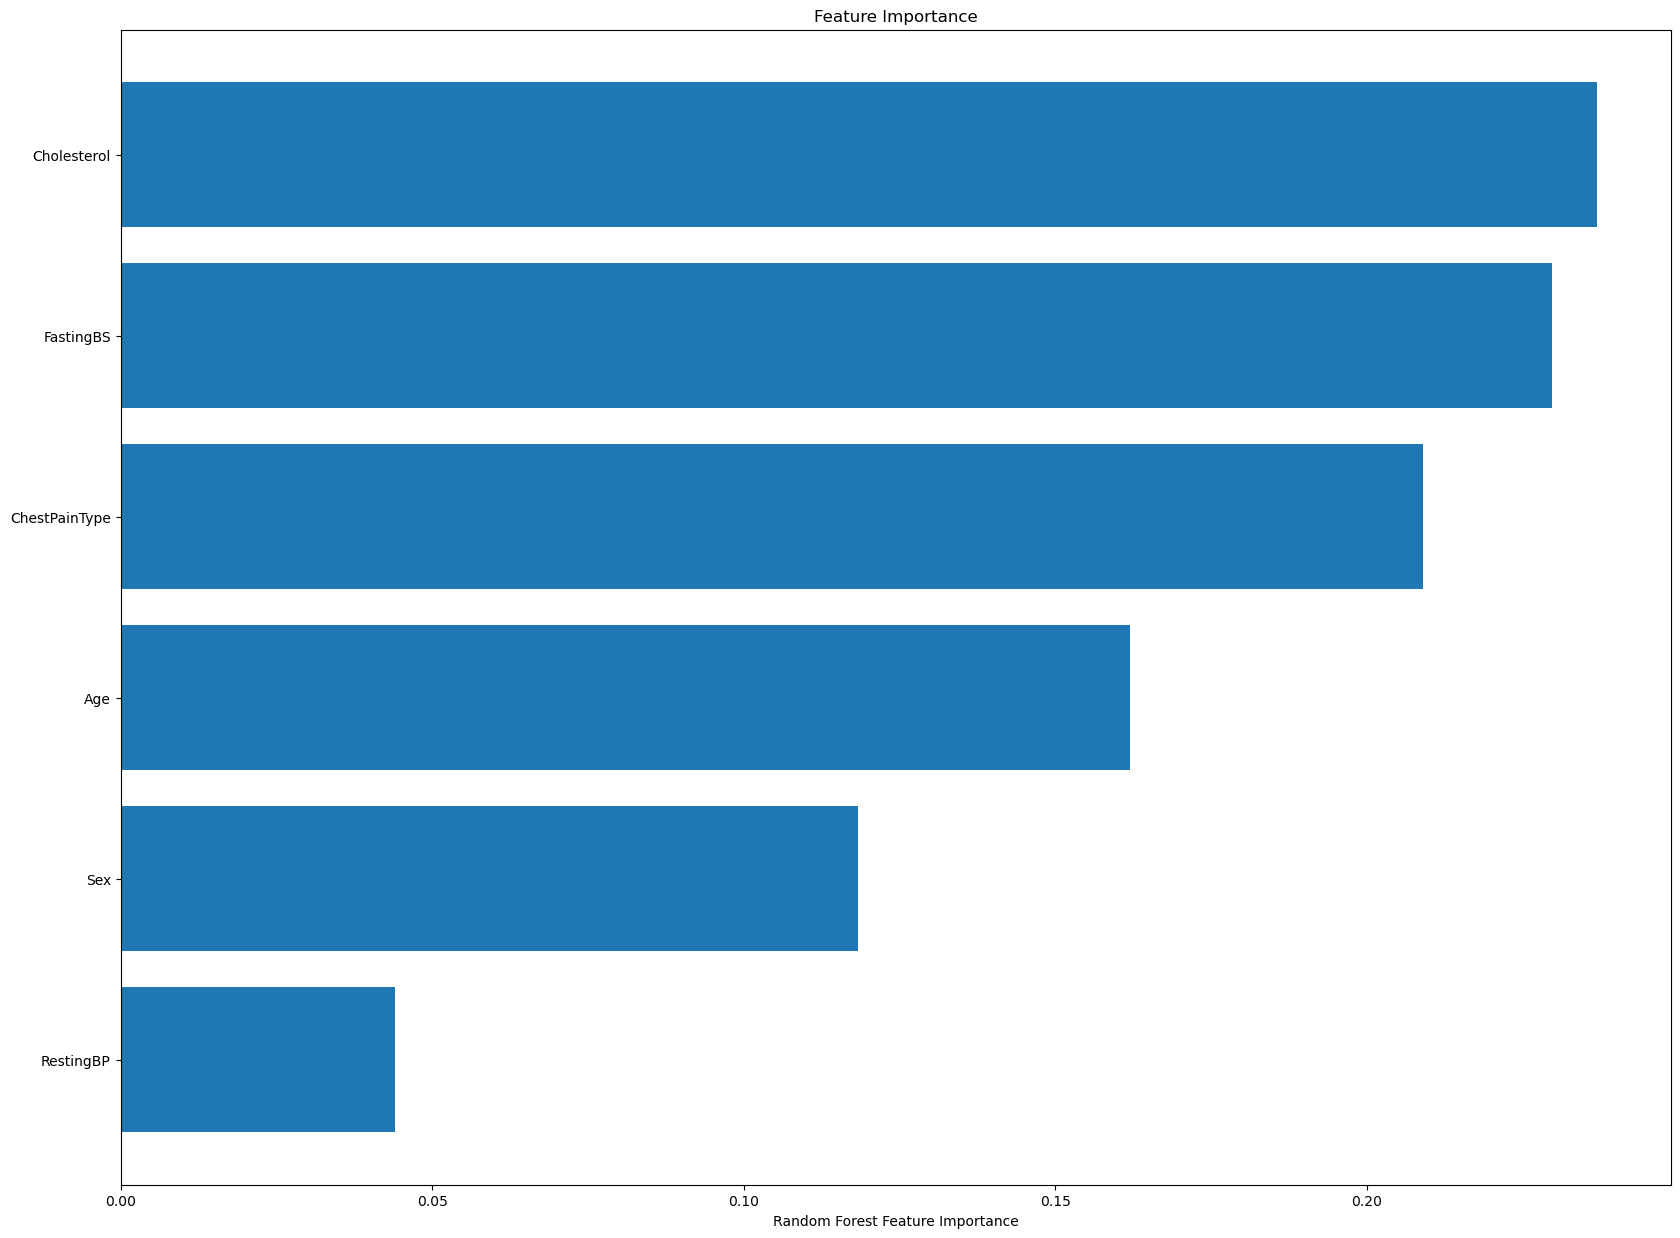

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier (clf could be any other tree-based model, like DecisionTreeClassifier)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)  # Assuming X_train and y_train are already defined and preprocessed

# Feature importance extraction and visualization
plt.figure(figsize=(20, 15))

# Extract feature importances
importance = clf.feature_importances_

# Get the indices that would sort the feature importances
idxs = np.argsort(importance)

# Plot the feature importances
plt.title("Feature Importance")
plt.barh(range(len(idxs)), importance[idxs], align="center")
plt.yticks(range(len(idxs)), [feature_col_nontree[i] for i in idxs])  # Use feature names from your list
plt.xlabel("Random Forest Feature Importance")

# Display the plot
plt.show()
